         Feature  Mean Importance  Importance Std  Std Mean
8          pTD_2         0.011660        0.031449  0.000541
21            z2         0.011637        0.016941  0.000417
18       sigma_3         0.011166        0.026366  0.000310
5      Ntracks_3         0.010799        0.009310  0.000326
19       sigma_4         0.008903        0.012773  0.000111
12      sigma1_3         0.007987        0.020831  0.000275
15      sigma2_3         0.007278        0.015318  0.000196
13      sigma1_4         0.006768        0.009839  0.000085
16      sigma2_4         0.005558        0.007499  0.000085
10         pTD_4         0.002799        0.002171  0.000265
6      Ntracks_4         0.002462        0.005481  0.000263
2   Nparticles_3         0.002436        0.006970  0.000485
14      sigma2_2         0.001725        0.002729  0.000074
20            z1        -0.002085        0.009190  0.000180
3   Nparticles_4        -0.006832        0.009740  0.000341
17       sigma_2        -0.013653       

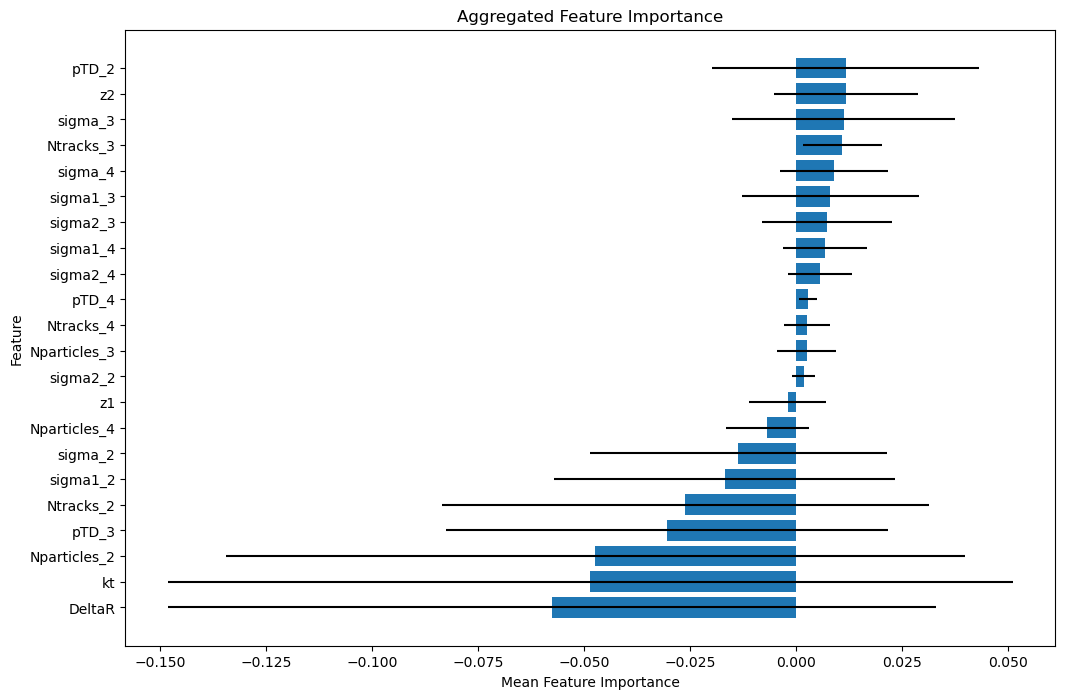

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def aggregate_importance(csv_files):
    
    data_frames = [pd.read_csv("../ML/importance/"+file) for file in csv_files]

    # 合并数据框
    merged_df = pd.concat(data_frames)

    # 按特征分组并计算平均重要性和标准误差
    grouped_df = merged_df.groupby('Feature').agg({
        'Importance': ['mean', 'std'],
        'Std': 'mean'
    }).reset_index()

    # 重命名列
    grouped_df.columns = ['Feature', 'Mean Importance', 'Importance Std', 'Std Mean']

    # 按平均重要性排序
    grouped_df = grouped_df.sort_values(by='Mean Importance', ascending=False)

    return grouped_df

def plot_importance(grouped_df, output_file):
    # 可视化特征重要性及误差
    plt.figure(figsize=(12, 8))
    plt.barh(grouped_df['Feature'], grouped_df['Mean Importance'], xerr=grouped_df['Importance Std'], align='center')
    plt.xlabel('Mean Feature Importance')
    plt.ylabel('Feature')
    plt.title('Aggregated Feature Importance')
    plt.gca().invert_yaxis()

    # 保存图表为 PDF 文件
    plt.savefig(output_file, format='pdf')

    # 显示图表
    plt.show()

csv_files = ['feature_importance_0.csv', 'feature_importance_1.csv', 'feature_importance_3.csv']
grouped_df = aggregate_importance(csv_files)
print(grouped_df)
plot_importance(grouped_df, 'aggregated_feature_importance.pdf')

# 保存聚合后的数据到 CSV 文件
grouped_df.to_csv('aggregated_feature_importance.csv', index=False)

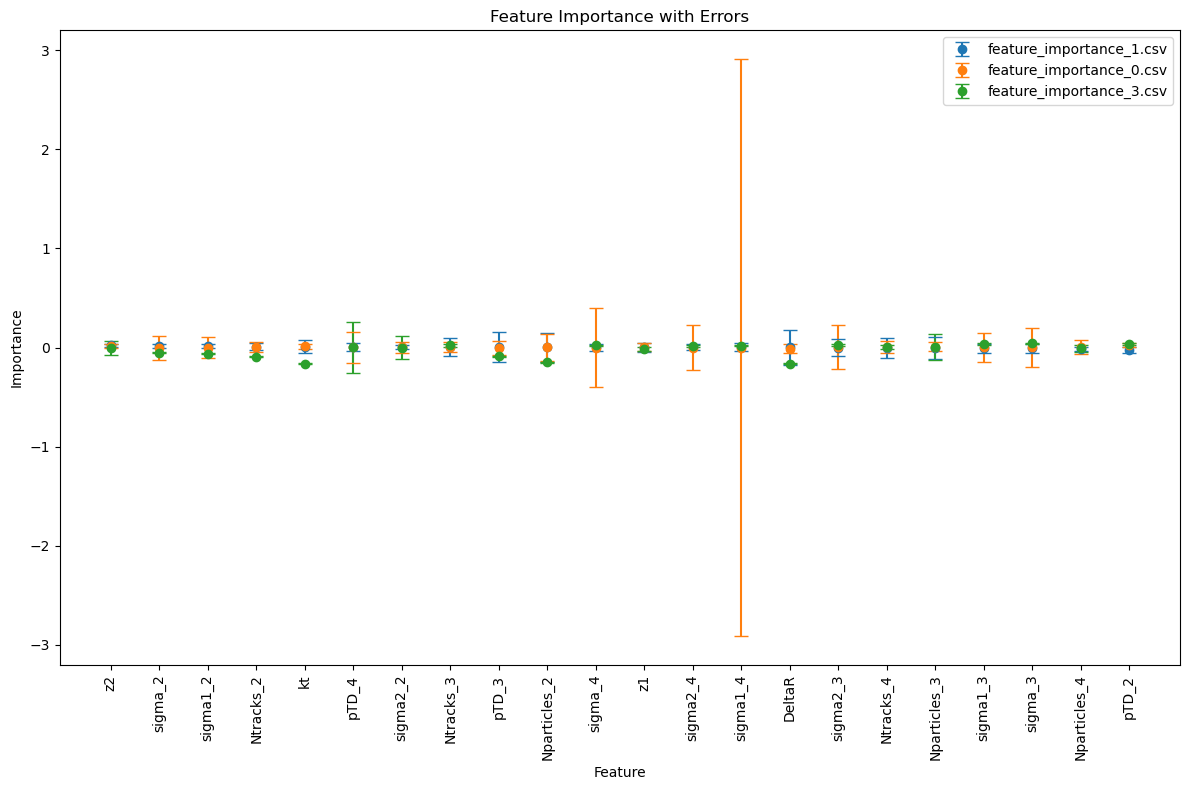

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径列表
csv_files = ['feature_importance_1.csv', 'feature_importance_0.csv', 'feature_importance_3.csv']

def read_and_merge_csv(csv_files):
    data_frames = [pd.read_csv("../ML/importance/"+file) for file in csv_files]
    merged_df = pd.concat(data_frames, keys=csv_files, names=['File']).reset_index(level=0)
    return merged_df

def plot_aggregated_importance(merged_df, output_file):
    # 提取文件名作为标签
    file_labels = merged_df['File'].unique()

    plt.figure(figsize=(12, 8))

    for file_label in file_labels:
        df = merged_df[merged_df['File'] == file_label]
        plt.errorbar(df['Feature'], df['Importance'], yerr=df['Std'], fmt='o', label=file_label, capsize=5)

    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance with Errors')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # 保存图表为 PDF 文件
    plt.savefig(output_file, format='pdf')

    # 显示图表
    plt.show()

# 读取并合并 CSV 文件
merged_df = read_and_merge_csv(csv_files)

# 绘制并保存图表
plot_aggregated_importance(merged_df, 'aggregated_feature_importance.pdf')

# 保存聚合后的数据到 CSV 文件
merged_df.to_csv('aggregated_feature_importance.csv', index=False)